# Hamiltonian simulation theory and application in simulating coupled classical oscillators

In this project we will implement Hamiltonian simulation with three different techniques: Product formulas (Suzuki - Trotter), Quantum Singular Eigenvalues ​​Transform (QSVT) and Qubitization, a brief theoretical foundation on product formulas, block encoding and Linear Combination of Unitaries (LCU) for the Hamiltonian first in a toy problem and then in the specific case estimated to simulate coupled classical oscillators           

In [ ]:
!pip install -U classiq

In [ ]:
!pip install pyqsp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyqsp: filename=pyqsp-0.1.6-py3-none-any.whl size=45210 sha256=bfb2691542dfe163d340bd78d27c93f9e47212dbce1c4ffba735701e07d9476a
  Stored in directory: /root/.cache/pip/wheels/db/75/56/4db5a2e7d732042098fb58b080326bb602dfcb3be12bf75a32
Successfully built pyqsp


In [ ]:
import classiq
classiq.authenticate()

/usr/local/lib/python3.10/dist-packages/classiq/_internals/authentication/token_manager.py:99: UserWarning: Device is already registered.
Generating a new refresh token should only be done if the current refresh token is compromised.
To do so, set the overwrite parameter to true
  warnings.warn(


In [ ]:
from classiq import *

## Introduccion teorica

Hamiltonian simulation  is a problem in quantum information science that attempts to find the computational complexity and quantum algorithms needed for simulating quantum systems. Hamiltonian simulation is a problem that demands algorithms which implement the evolution of a quantum state efficiently. The Hamiltonian simulation problem was proposed by Richard Feynman in 1982, where he proposed a quantum computer as a possible solution since the simulation of general Hamiltonians seem to grow exponentially with respect to the system size.



### PRODUCT FORMULAS (Suzuki - Trotter)
Product formulas simulate the sum-of-terms of a Hamiltonian by simulating each one separately for a small time slice
 If $
𝐻
=
𝐴
+
𝐵
+
𝐶$
 then $
𝑈
=
𝑒
−
𝑖
(
𝐴
+
𝐵
+
𝐶
)
𝑡
=
(
𝑒
−
𝑖
𝐴
𝑡
/
𝑟
.
𝑒
−
𝑖
𝐵
𝑡
/
𝑟
.
𝑒
−
𝑖
𝐶
𝑡
/
𝑟
)^
𝑟$
 for a large
𝑟
; where
𝑟
 is the number of time steps to simulate for. The larger the
𝑟
, the more accurate the simulation.

###LINER COMBINATION OF  UNITARIES (LCUs)

Linear combinations of unitaries are straightforward — it’s already explained in the name: we decompose operators into a weighted sum of unitaries. Mathematically, this means expressing an operator  
A
  in terms of coefficients  α_k
  and unitaries  U_k
  as $A = \sum_{k=0}^{N-1} \alpha_k U_k.$ A general way to build LCUs is to employ properties of the Pauli basis. This is the set of all products of Pauli matrices  
{
I
,
X
,
Y
,
Z
}
 . For the space of operators acting on n
  qubits, this set forms a complete basis. Thus, any operator can be expressed in the Pauli basis, which immediately gives an LCU decomposition.

### BlOCK ENCONDINGS
Definition: $A (s, m, \epsilon)$
-encoding of a $2^n\times 2^n$
 matrix
 refers to completing it into a $2^{n+m}\times 2^{n+m}$
 unitary matrix $U_{(s,m,\epsilon)-H}$
:$ U_{(s,m,\epsilon)-H} = \begin{pmatrix}
H/s & * \\
* & *
\end{pmatrix}$

with some functional error $\left|\left(U_{(s,m,\epsilon)-H}\right)_{0:2^n-1,0:2^n-1}-H/s \right|\leq \epsilon$
The basic usage of the block-encoding unitary: let say we have a $(s, m, 0)$-encoding of a matrix $A$:


$U_{(s, m, 0)-A} = \begin{pmatrix}
  A/s & *  \\
  * & *
\end{pmatrix},$
where the dimension of $A$  is $2^n\times 2^n$.  If we apply this unitary on the state:

$|\psi\rangle_n|0\rangle_m =|\psi\rangle_n \otimes
\begin{pmatrix}
  1  \\
   0\\
  \vdots \\
  0
\end{pmatrix} =  
\begin{pmatrix}
  |\psi\rangle_n  \\
   0\\
  \vdots \\
  0
\end{pmatrix},$
we get $ U_{(s, m, 0)-A} \left(|\psi\rangle_n|0\rangle_m \right) $= \begin{pmatrix}
  \frac{1}{s}A|\psi\rangle_n  \\
   0\\
  \vdots \\
  0
\end{pmatrix} $\begin{pmatrix}
   0  \\
    *\\
   \vdots \\
*
\end{pmatrix}$ = $\frac{1}{s}A|\psi\rangle_n|0\rangle_m +\sum_{l\neq 0} c_l |\phi\rangle_n|l\rangle_m . $ Thus, if we measure
 on the second variable we know the first variable is the state $\frac{1}{s}A|\psi\rangle_n$  In terms of measurment, we shall post-select on $|0\rangle_m$
 to measure the desired state.

#Encoding of the problem

# Hamiltonian Simulation with Product Formulas (Suzuki - Trotter)  approach

Implementation of Suzuki Trotter formulas
A given  formula $ST(o,r,t)$ has and exponentially different ways to be implemented

**Classiq** provides an optimized implementation, reducing CX - counts  and function depth.

First we will implement it in a toy problem and in the final section we will apply it along with the other methods to the case of coupled oscillators

## TOY PROBLEM
For simplicity, we now take a specific Hamiltonian with which we continue to the next sections.
$H = 0.2 \cdot I\otimes I +0.6\cdot  I\otimes Z + 0.4 \cdot X \otimes X + 0.2\cdot  Z\otimes Z + 0.3\cdot  Y\otimes Z$

In [ ]:
from classiq import (
    CReal,
    Output,
    Pauli,
    PauliTerm,
    QArray,
    QBit,
    allocate,
    create_model,
    qfunc,
    suzuki_trotter,
    synthesize,
    write_qmod,
)




In [ ]:
HAMILTONIAN = [
    PauliTerm(pauli=[Pauli.I, Pauli.I], coefficient=0.2),
    PauliTerm(pauli=[Pauli.I, Pauli.Z], coefficient=0.6),
    PauliTerm(pauli=[Pauli.X, Pauli.X], coefficient=0.4),
    PauliTerm(pauli=[Pauli.Y, Pauli.Z], coefficient=0.3),

]

In [ ]:

@qfunc
def main(a: CReal, x: CReal, qba: Output[QArray[QBit]]):
    allocate(2, qba)
    suzuki_trotter(
        HAMILTONIAN,
        evolution_coefficient=x,
        order=1,
        repetitions=1,
        qbv=qba,
    )





In [ ]:
qmod = create_model(main)


In [ ]:
write_qmod(qmod, "suzuki_trotter")


In [ ]:
qprog = synthesize(qmod)

In [ ]:
show(qprog)

Opening: https://platform.classiq.io/circuit/e83aa4a1-ce4e-4809-b0a8-07e7f0e47615?version=0.44.0


### QSVT and Qubitization approaches

We start with an encoding of some Hamiltonian , and implement an approximated encoding of its Hamiltonian evolution in a toy problem : $U_{(\tilde{s},\tilde{m},\epsilon)-\exp{(iHt)}} = \begin{pmatrix}
\exp{(iHt)}/\tilde{s} & * \\
* & *
\end{pmatrix},$ using QSVT and Qubitization approaches. Both implementations are based on polynomial approximation of the function $f(x)=e^{ix}$in particular, we will perform the block-encoding of $\cos(Ht)$ and $\sin(Ht)$ and then construct an LCU for $e^{iHt}=\cos(Ht)+i\sin(Ht)$ Therefore, the LCU methodology is employed at least twice, once for the block-encoding of  $H$
, and the second for block-encoding the sum of sine and cosine.


###The Jacobi–Anger Expansion
The Jacobi–Anger expansion approximates the sine and cosine functions with Chebyshev polynomials
$\begin{eqnarray}
\cos(xt) &=& J_0(t) + 2\sum^{d}_{k=1} (-1)^k J_{2k}(t) T_{2k}(x)\\
\sin(xt) &=& 2\sum^{d}_{k=0} (-1)^k J_{2k+1}(t) T_{2k+1}(x),
\end{eqnarray}$
where $J_i(x)$
 and $T_i(x)$
 are the Bessel function and Chebychev Polynomial of order
, respectivaly, and the degree $d$
 is related to the approximation error $\epsilon$
 as

 $d = O\left(t - \frac{\log\epsilon}{1+\log\left(e-\frac{\log(\epsilon)}{t}\right)}\right).$

###Building LCU for Pauli Strings
LCU tell us we can represent $ H $ as:

$H = \sum^{L-1}_{i=0} \alpha_i U_i, $

where $U_i$
 are Pauli strings.

Next we will definde some functions for apply LCU
from the LCU decomposition  
$A =  \sum_{k=0}^{N-1} \alpha_k U_k$ with positive, real coefficients, we define the prepare (PREP) operator:


$\text{PREP}|0\rangle = \sum_k \sqrt{\frac{|\alpha_k|}{\lambda}}|k\rangle,$

where $ \lambda$  is a normalization constant defined as \lambda = \sum_k |\alpha_k|,and the select (SEL) operator:


$\text{SEL}|k\rangle |\psi\rangle = |k\rangle U_k |\psi\rangle.$


They are aptly named: PREP prepares a state whose amplitudes are determined by the coefficients of the LCU, and SEL selects which unitary is applied.

We define a function that gets the list of $L$
 coefficients and returns the probabilities to be loaded as part of the LCU

In [ ]:
def get_normalized_lcu_coef(lcu_coef):

    normalization_factor = sum(lcu_coef)
    prepare_prob = [c / normalization_factor for c in lcu_coef]
    coef_size = int(np.ceil(np.log2(len(prepare_prob))))
    prepare_prob += [0] * (2**coef_size - len(prepare_prob))

    print("The size of the block encoding:", coef_size)
    print("The normalized coefficients:", prepare_prob)
    print("The normalization factor:", normalization_factor)

    return normalization_factor, coef_size, prepare_prob

In [ ]:

""" FUNCTION FOR IMPLEMENT LCU
pauli_terms_list: the list of Pauli strings
  probs: the normalized coefficients
  data: the quantum variable on which the Hamiltonian operates
  block: the quantum "prepare" variable for the block encoding"""
@qfunc
def apply_pauli_term(pauli_string: PauliTerm, x: QArray[QBit]):
    repeat(
        count=x.len,
        iteration=lambda index: switch(
            pauli_string.pauli[index],
            [
                lambda: IDENTITY(x[pauli_string.pauli.len - index - 1]),
                lambda: X(x[pauli_string.pauli.len - index - 1]),
                lambda: Y(x[pauli_string.pauli.len - index - 1]),
                lambda: Z(x[pauli_string.pauli.len - index - 1]),
            ],
        ),
    )


In [ ]:
@qfunc
def lcu_paulis(
    pauli_terms_list: CArray[PauliTerm],
    probs: CArray[CReal],
    block: QNum,
    data: QArray[QBit],
):
    within_apply(
        lambda: inplace_prepare_state(probs, 0.0, block),
        lambda: repeat(
            count=pauli_terms_list.len,
            iteration=lambda i: control(
                block == i, lambda: apply_pauli_term(pauli_terms_list[i], data)
            ),
        ),
    )

In [ ]:
""" Classiq offers integration with multiple cloud providers, to allow seamless execution of quantum programs on multiple backends,
 in this ocation we use Classiq cloud but we can change for whatever we want"""

quantum_model = create_model(main)
quantum_model_with_execution_preferences = set_execution_preferences(
    quantum_model,
    ExecutionPreferences(
        num_shots=5096,backend_preferences=ClassiqBackendPreferences(
        backend_name=ClassiqSimulatorBackendNames.SIMULATOR_STATEVECTOR
    ), job_name="hamiltonian_simulator", random_seed=767
    ),
)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
def get_projected_state_vector(
    execution_result,
    measured_var: str,
    projections: dict,
) -> np.ndarray:
    """
    This function returns a reduced statevector from execution results.
    measured var: the name of the reduced variable
    projections: on which values of the other variables to project, e.g., {"ind": 1}
    """
    projected_size = len(execution_result[0].value.output_qubits_map[measured_var])
    proj_statevector = np.zeros(2**projected_size).astype(complex)
    for sample in execution_result[0].value.parsed_state_vector:
        if all(sample.state[key] == projections[key] for key in projections.keys()):
            proj_statevector[int(sample.state[measured_var])] += sample.amplitude
    return proj_statevector

### PLAYING WITH OUR TOY PROBLEM
$H = 0.2 \cdot I\otimes I +0.6\cdot  I\otimes Z + 0.4 \cdot X \otimes X + 0.3\cdot  Y\otimes Z$

In [ ]:
HAMILTONIAN = [
    PauliTerm(pauli=[Pauli.I, Pauli.I], coefficient=0.2),
    PauliTerm(pauli=[Pauli.I, Pauli.Z], coefficient=0.6),
    PauliTerm(pauli=[Pauli.X, Pauli.X], coefficient=0.4),
    PauliTerm(pauli=[Pauli.Y, Pauli.Z], coefficient=0.3),

]

In [ ]:
HAMILTONIAN = [
    PauliTerm(pauli=[Pauli.I, Pauli.I], coefficient=0.4),
    PauliTerm(pauli=[Pauli.I, Pauli.Z], coefficient=0.1),
    PauliTerm(pauli=[Pauli.X, Pauli.X], coefficient=0.05),
    PauliTerm(pauli=[Pauli.Z, Pauli.Z], coefficient=0.2),
]

In [ ]:
lcu_pauli_coef = [p.coefficient for p in HAMILTONIAN] #CALCULATING coefficients for the LCU, alpha factor:
normalization_ham, lcu_size_ham, prepare_probs_ham = get_normalized_lcu_coef(
    lcu_pauli_coef
)

The size of the block encoding: 2
The normalized coefficients: [0.5333333333333333, 0.13333333333333333, 0.06666666666666667, 0.26666666666666666]
The normalization factor: 0.75


##Verification of the Hamiltonian Block Encoding
For this, we define a model in which we apply $U_H$
 on some random vector state of size $2^n\cdot 2^m$ , $(\vec{b},\vec{0})$

, and verify that the resulting state, after post-selection, gives $(H/\bar{\alpha})\vec{b}
.$

In [ ]:
data_size = len(HAMILTONIAN[0].pauli)
b = np.random.rand(2**data_size)
b = (b / np.linalg.norm(b)).tolist()

In [ ]:
@qfunc
def main(data: Output[QNum], block: Output[QNum]):
    allocate(lcu_size_ham, block)
    prepare_amplitudes(b, 0.0, data)
    lcu_paulis(HAMILTONIAN, prepare_probs_ham, block, data)


###Post-process Functions
Working with block-encoding typically requires post-selection of the block variables being at state 0

We will work with a state vector simulator. We will define a function that gets execution results and returns a projected state vector.

In [ ]:
from classiq.execution import (
    ClassiqBackendPreferences,
    ClassiqSimulatorBackendNames,
    ExecutionPreferences,
)

In [ ]:
## fix the execution preferences for this tutorial
Execution_Prefs = ExecutionPreferences(
        num_shots=5096,backend_preferences=ClassiqBackendPreferences(
        backend_name=ClassiqSimulatorBackendNames.SIMULATOR_STATEVECTOR
    ),
)

In [ ]:
""" Classiq offers integration with multiple cloud providers, to allow seamless execution of quantum programs on multiple backends,
 in this ocation we use Classiq cloud but we can change for whatever we want"""

quantum_model = create_model(main)
quantum_model_with_execution_preferences = set_execution_preferences(
    quantum_model,
    ExecutionPreferences(
        num_shots=5096,backend_preferences=ClassiqBackendPreferences(
        backend_name=ClassiqSimulatorBackendNames.SIMULATOR_STATEVECTOR
    ), job_name="hamiltonian_simulator", random_seed=767
    ),
)

In [ ]:
quantum_program_with_execution_preferences = synthesize(
    quantum_model_with_execution_preferences
)
job = execute(quantum_program_with_execution_preferences)

In [122]:
show(quantum_program_with_execution_preferences)

Opening: https://platform.classiq.io/circuit/2d0a0d4e-fe8d-4e68-a033-bb783d9b8e9a?version=0.44.0


In [ ]:
res = execute(quantum_program_with_execution_preferences).result()


In [ ]:
#We use our pre-defined function for the post-selection:
state_result = get_projected_state_vector(res, "data", {"block": 0.0})

 For comparing to the expected result, we define classical functions that help us to get the matrix in the standard basis:

In [ ]:
PAULI_MATRICES_DICT = {
    Pauli.I: np.array([[1, 0], [0, 1]], dtype=np.complex128),
    Pauli.Z: np.array([[1, 0], [0, -1]], dtype=np.complex128),
    Pauli.X: np.array([[0, 1], [1, 0]], dtype=np.complex128),
    Pauli.Y: np.array([[0, -1j], [1j, 0]], dtype=np.complex128),
}


def pauli_list_to_mat(pauli_list: list) -> np.ndarray:
    real_matrix = 0
    for term in pauli_list:
        single_str = PAULI_MATRICES_DICT[term.pauli[0]]
        for pauli in term.pauli[1:]:
            single_str = np.kron(single_str, PAULI_MATRICES_DICT[pauli])
        real_matrix += term.coefficient * single_str

    assert np.allclose(
        np.transpose(np.conjugate(real_matrix)), real_matrix
    ), "matrix not Hermitian"
    assert np.allclose(np.imag(real_matrix), 0.0), "matrix is not real valued"
    return np.real(real_matrix)

In [ ]:
matrix = pauli_list_to_mat(HAMILTONIAN)

In [ ]:
expected_state = matrix / normalization_ham @ b
relative_phase = np.angle(expected_state[0] / state_result[0])
state_result = state_result * np.exp(1j * relative_phase)

In [ ]:
print("The resulting state:", np.real(state_result))
print("The expected state:", expected_state)
assert np.allclose(np.real(state_result), expected_state)

The resulting state: [0.59277049 0.10811308 0.25792229 0.1217088 ]
The expected state: [0.59277049 0.10811308 0.25792229 0.1217088 ]


#Hamiltonian Simulation with Qubitization

Given our block-encoding $U_{(s,m,0)-H}$
 we can define the following operator (usually called Szegedy quanutm walk-operator:

 $W\equiv -\Pi_{|0\rangle_m} U_{(s,m,0)-H},$
 where $\Pi_{|0\rangle_m}$
 is a reflection operator about the block state. This unitary function has the important property that its powers correspond to a $(1,m,0)$
-encoding of the Chebychev polynomials:

$W^k = \begin{pmatrix}
T_k(H) & * \\
* & *
\end{pmatrix}=U_{(1,m,0)-T_k(H)},$

with $T_k$
 being the k-th Chebychev polynomial. For more details see Sec. 7 in Ref. [2] (the property holds only for Hermitian block-encoding, for generalization see comment 3 below). We can thus simply combine the Jacobi–Anger expansion with the LCU technique to get the block-encoding for the Hamiltonain simulation. Namely, we have an
-approximation of
, for which we can perform the following encoding
$
U_{(\bar{\beta},\tilde{m},\epsilon)-\exp{(iHt)}} =
\begin{pmatrix}
\exp{(iHt)}/\bar{\beta} & * \\
* & *
\end{pmatrix}=
\begin{pmatrix}
\frac{1}{\bar{\beta}}\sum^d_{k=0} \beta_{k} U_{(1,m,0)-T_k(H)} & * \\
* & *
\end{pmatrix}=
\begin{pmatrix}
\frac{1}{\bar{\beta}}\sum^d_{k=0} \beta_{k} T_{k}(Ht) & * \\
* & *
\end{pmatrix}
=\begin{pmatrix}
\frac{1}{\bar{\beta}}\sum^d_{k=0} W^k & * \\
* & *
\end{pmatrix},$

where $\tilde{m}=m+\lceil \log_2(d+1) \rceil$
 (recall that $W$
 are block-encoding themeselves with block size
).

First we define a walk-operator for our specific toy problem. For the reflection we can use the reflect_about_zero quantum function from Classiq's open library.

In [ ]:
@qfunc
def my_walk_operator(block: QArray[QBit], data: QArray[QBit]) -> None:
    lcu_paulis(HAMILTONIAN, prepare_probs_ham, block, data)
    reflect_about_zero(block)
    RY(2 * pi, block[0])  # for the minus sign

Next, we use our pre-defined function to calculate the coefficients $\beta_i$
 for approximating the sine and cosine functions. Recall that we want to approximate $e^{iHt}$
, whereas our Hamiltonian is encoded with a normalization factor $\bar{\alpha}$
. Therefore, we must rescale the time by this factor.

In [ ]:
from scipy.special import eval_chebyt, jv


def get_cheb_coef(epsilon, t):
    poly_degree = int(
        np.ceil(
            t
            + np.log(epsilon ** (-1)) / np.log(np.exp(1) + np.log(epsilon ** (-1)) / t)
        )
    )
    cos_coef = [jv(0, t)] + [
        2 * jv(2 * k, t) * (-1) ** k for k in range(1, poly_degree // 2 + 1)
    ]
    sin_coef = [
        -2 * jv(2 * k - 1, t) * (-1) ** k for k in range(1, poly_degree // 2 + 1)
    ]
    return cos_coef, sin_coef

In [ ]:
EVOLUTION_TIME = 10
EPS = 0.1
normalized_time = normalization_ham * EVOLUTION_TIME

cos_coef, sin_coef = get_cheb_coef(EPS, normalized_time)

combined_sin_cos_coef = []
for k in range(len(cos_coef) - 1):
    combined_sin_cos_coef.append(cos_coef[k])
    combined_sin_cos_coef.append(sin_coef[k])
combined_sin_cos_coef.append(cos_coef[-1])
if len(sin_coef) == len(cos_coef):
    combined_sin_cos_coef.append(sin_coef[-1])

Given the coefficients, we should now calculate the probabilities for the LCU prepare variable. These must be positive numbers. Moreover, for the odd terms, which corresponds to the sine function, we should add a factor of $i$. Those factors should be added to the unitary operations $W^k$. To take this into account, for each term we define a "generalized sign" $\sigma_k$ such that $\beta_k = e^{\frac{\pi}{2}\sigma_k i} |\beta_k|$ with $\sigma_k \in \{0,1,2,3\}$ that corresponds to the factors $1,i,-1,-i$ respectively.

In [ ]:
signs_cheb_coef = np.sign(combined_sin_cos_coef).tolist()
generalized_signs = [
    (1 - signs_cheb_coef[s]) + (s) % 2 for s in range(len(signs_cheb_coef))
]
positive_cheb_lcu_coef = np.abs(combined_sin_cos_coef)

Now that we have our positive coefficients, we can use the pre-defined pre-process function to get the probabilities for the LCU:

In [ ]:
normalization_exp, lcu_size_exp, prepare_probs_exp = get_normalized_lcu_coef(
    positive_cheb_lcu_coef
)

The size of the block encoding: 4
The normalized coefficients: [0.06646302105481755, 0.0675004177853092, 0.1149259307002193, 0.1287942474920928, 0.011890532706545038, 0.14147748237907418, 0.17674611046555389, 0.14131629436581203, 0.0870443056839619, 0.04437822442664005, 0.019463432939974202, 0, 0, 0, 0, 0]
The normalization factor: 4.007336014122893


We define a quantum function for a generic LCU of Chebyshev polynomials, which gets the prepare probabilities, the generalized signs, and a walk operator as a quantum callable.

In [ ]:
@qfunc
def lcu_cheb(
    coef: CArray[CReal],
    generalized_signs: CArray[CInt],
    walk_operator: QCallable[QNum, QArray],
    walk_block: QNum,
    walk_data: QArray,
    cheb_block: QNum,
):

    within_apply(
        lambda: inplace_prepare_state(coef, 0.0, cheb_block),
        lambda: repeat(
            generalized_signs.len,
            lambda k: control(
                cheb_block == k,
                lambda: (
                    U(0, 0, 0, pi / 2 * generalized_signs[k], walk_data[0]),
                    power(k, lambda: walk_operator(walk_block, walk_data)),
                ),
            ),
        ),
    )

In [ ]:
from classiq.qmod.symbolic import pi
@qfunc
def main(ham_block: Output[QNum], data: Output[QNum], exp_block: Output[QNum]):
    allocate(lcu_size_exp, exp_block)
    allocate(lcu_size_ham, ham_block)
    prepare_amplitudes(b, 0.0, data)
    lcu_cheb(
        prepare_probs_exp,
        generalized_signs,
        lambda x, y: my_walk_operator(x, y),
        ham_block,
        data,
        exp_block,
    )


qmod = create_model(main, execution_preferences=Execution_Prefs)
write_qmod(qmod, "hamiltonian_simulation_qubitization", decimal_precision=12)

In [ ]:
qprog = synthesize(qmod)
show(qprog)

Opening: https://platform.classiq.io/circuit/398d270d-b4c5-42b2-981d-5645422eb1be?version=0.44.0


In [ ]:
results = execute(qprog).result()

In [ ]:
state_result = get_projected_state_vector(
    results, "data", {"exp_block": 0.0, "ham_block": 0.0}
)

In [ ]:
expected_state = (
    1 / normalization_exp * scipy.linalg.expm(1j * matrix * EVOLUTION_TIME) @ b
)
relative_phase = np.angle(expected_state[0] / state_result[0])
state_result = state_result * np.exp(
    1j * relative_phase
)  # rotate according to a global phase
print("expected state:", expected_state)
print("resulting state:", state_result)
assert np.linalg.norm(state_result - expected_state) < EPS

expected state: [ 0.10417095+0.11318781j  0.02230509+0.0741775j  -0.17535282-0.01350316j
  0.02341227+0.03360672j]
resulting state: [ 0.10270752+0.1115977j   0.02019997+0.07282236j -0.17594503-0.01183846j
  0.0228454 +0.03341295j]


In [ ]:
print(
    "overlap between expected and resulting state:",
    np.abs(np.vdot(state_result, expected_state))
    * normalization_exp
    / np.linalg.norm(state_result),
)

overlap between expected and resulting state: 0.9999088609126758


# Hamiltonian Simulation with QSVT

In the QSVT approach we repeatedly apply two operations:  $U_H$ application and rotated reflections around the block space, applied on an extra qubit. The value of the rotation angles can be found using the `pyqsp` package.

The QSVT gives block-encoding of polynomials with a well defined-parity. Thus, we have to apply two QSVT blocks, one for approximating the $\cos(xt)$ function and one for the $\sin(xt)$ function, and then, for the finale, construct an LCU to get the block-encoding the sum: $e^{ixt} = \cos(xt)+i\sin(xt)$



Initially we will calculate the rotation angles for the sine and cosine polynomial approximations. As in the Qubitization method, we need to normalize the evolution time $t$. In addition, the `pysqp` adds a factor $1/2$ to the sine and cosine polynomials.

In [ ]:
import pyqsp
from pyqsp.angle_sequence import Polynomial, QuantumSignalProcessingPhases

pg_cos = pyqsp.poly.PolyCosineTX()
pcoefs_cos, scale_cos = pg_cos.generate(
    epsilon=EPS, tau=normalized_time, return_scale=True
)
poly_cos = Polynomial(pcoefs_cos)

pg_sin = pyqsp.poly.PolySineTX()
pcoefs_sin, scale_sin = pg_sin.generate(
    epsilon=EPS, tau=normalized_time, return_scale=True
)
poly_sin = Polynomial(pcoefs_sin)

12.104183283573647
R=6
[PolyCosineTX] rescaling by 0.5.
12.104183283573647
R=6
[PolySineTX] rescaling by 0.5.


In [ ]:
ang_seq_cos = QuantumSignalProcessingPhases(
    poly_cos,
    signal_operator="Wx",
    method="laurent",
    measurement="x",
    tolerance=0.00001,  # relaxing the tolerance to get convergence
)

ang_seq_sin = QuantumSignalProcessingPhases(
    poly_sin,
    signal_operator="Wx",
    method="laurent",
    measurement="x",
    tolerance=0.00001,  # relaxing the tolerance to get convergence
)


# change W(x) to R(x), as the phases are in the W(x) conventions
def convert_phases_to_Rx_convention(ang_seq):

    phases = np.array(ang_seq)
    phases[1:-1] = phases[1:-1] - np.pi / 2
    phases[0] = phases[0] - np.pi / 4
    phases[-1] = phases[-1] + (2 * (len(phases) - 1) - 1) * np.pi / 4

    # verify conventions. minus is due to exp(-i*phi*z) in qsvt in comparison to qsp
    phases = -2 * phases

    return phases.tolist()

The list of angles to use within the `qsvt` function are given by:

In [ ]:
phases_cos = convert_phases_to_Rx_convention(ang_seq_cos)
phases_sin = convert_phases_to_Rx_convention(ang_seq_sin)

Next, we use Classiq's qsvt function to get the QSVT of the sine and cosine block encoding.

We define a qsvt function for our specific Hamiltonian and approximation. Passing it the series of angles `phases_cos` or `phases_sin` generates the block-encodings:
$$
U_{(2,m+1,\epsilon)-\cos(Ht)} = \begin{pmatrix}
\cos(iHt)/2 & * \\
* & *
\end{pmatrix}, \,\,\,\,\,\,
U_{(2,m+1,\epsilon)-\sin(Ht)} = \begin{pmatrix}
\sin(iHt)/2 & * \\
* & *
\end{pmatrix}
$$  
where the extra qubit and factor $1/2$ in the encoding comes from the QSVT.

In [ ]:
@qfunc
def identify_block(num_data_qubits: CInt, qvar: QArray[QBit], qubit: QBit):
    block_qubits = QNum("block_qubits", qvar.len - num_data_qubits, False, 0)
    data = QArray("data", length=num_data_qubits)

    bind(qvar, [block_qubits, data])
    qubit ^= block_qubits == 0
    bind([block_qubits, data], qvar)


# defining a qsvt for our toy problem
@qfunc
def my_qsvt(phases: CArray[CReal], qsvt_aux: QBit, block_ham: QArray, data: QArray):
    combined_vars = QArray("combined_vars")
    bind([block_ham, data], combined_vars)

    qsvt(
        phase_seq=phases,
        proj_cnot_1=lambda qvar, qubit: identify_block(data.len, qvar, qubit),
        proj_cnot_2=lambda qvar, qubit: identify_block(data.len, qvar, qubit),
        u=lambda x: lcu_paulis(
            HAMILTONIAN,
            prepare_probs_ham,
            x[0 : block_ham.len],
            x[block_ham.len : x.len],
        ),
        qvar=combined_vars,
        aux=qsvt_aux,
    )

    bind(combined_vars, [block_ham, data])

To get our desired Hamiltonian simulation we apply an LCU with the two unitaries:
$$
U_{(2,m+1,\epsilon)-\cos(Ht)} + iU_{(2,m+1,\epsilon)-\sin(Ht)},
$$
The normalized LCU coefficients are thus $(1/2,1/2)$, giving an $(4, m+2,\epsilon)$-encoding for the Hamiltonian simulation:
$$
U_{((4, m+2,\epsilon))-\exp{(iHt)}} = \begin{pmatrix}
\frac{1}{4}\exp{(iHt)} & * \\
* & *
\end{pmatrix}.
$$


 In the rest of this section we build a model that applies this block-encoding on the randomly prepared $(\vec{b},\vec{0})$; synthesizes it; executes the resulting quantum program; and verifies the results and our next step its take finally our desired hamiltonian of coupled classical oscillators

In [ ]:
@qfunc
def main(
    qsvt_aux: Output[QBit],
    block_ham: Output[QNum],
    data: Output[QNum],
    block_exp: Output[QBit],
):
    allocate(1, qsvt_aux)
    allocate(1, block_exp)
    allocate(lcu_size_ham, block_ham)
    prepare_amplitudes(b, 0.0, data)
    within_apply(
        lambda: H(block_exp),
        lambda: (
            control(
                block_exp == 0,  # cosine
                lambda: my_qsvt(phases_cos, qsvt_aux, block_ham, data),
            ),
            control(
                block_exp == 1,  # sine
                lambda: (
                    U(0, 0, 0, pi / 2, qsvt_aux),  # for the i factor
                    my_qsvt(phases_sin, qsvt_aux, block_ham, data),
                ),
            ),
        ),
    )

In [ ]:
qmod = create_model(main, execution_preferences=Execution_Prefs)
write_qmod(qmod, "hamiltonian_simulation_qsvt", decimal_precision=7)

In [ ]:
qprog = synthesize(qmod)
show(qprog)

Opening: https://platform.classiq.io/circuit/cd0ce4f7-d4b2-4f53-bfe6-3c4ad8e9a57b?version=0.44.0


In [ ]:
results = execute(qprog).result()

In [ ]:
state_result = get_projected_state_vector(
    results, "data", {"block_ham": 0.0, "qsvt_aux": 0.0, "block_exp": 0.0}
)

In [ ]:
expected_state = 1 / 4 * scipy.linalg.expm(1j * matrix * EVOLUTION_TIME) @ b
relative_phase = np.angle(expected_state[0] / state_result[0])
state_result = state_result * np.exp(
    1j * relative_phase
)  # rotate according to a global phase
print("expected state:", expected_state)
print("resulting state:", state_result)
assert np.linalg.norm(state_result - expected_state) < EPS

expected state: [ 0.104362  +0.1133954j   0.022346  +0.07431354j -0.17567442-0.01352793j
  0.02345521+0.03366836j]
resulting state: [ 0.10434454+0.11337642j  0.02232913+0.07427543j -0.17581702-0.01349815j
  0.02344675+0.03366169j]


In [ ]:
print(
    "overlap between expected and resulting state:",
    np.abs(np.vdot(state_result, expected_state)) * 4 / np.linalg.norm(state_result),
)

overlap between expected and resulting state: 0.9999998529726876


##HAMILTONIAN SIMULATION OF COUPLED CLASSICAL OSCILLATORS

Now that we know some techniques and how they are implemented, we will go further to the specific case of the paper https://arxiv.org/pdf/2303.13012 "Exponential quantum speedup in simulating coupled classical oscillators" applying those approximations in this specific Hamiltonian

At a high level, in the glued trees problem of
Ref. [2], we are given oracle access to the adjacency
matrix of a sparse graph with an ENTRANCE vertex,
and the goal is to find the EXIT vertex. We map this
problem to a system of masses and springs by putting
a unit mass at each vertex and a spring of unit spring
constant at every edge. Then we show that if the
system starts at rest except with the ENTRANCE
vertex having unit velocity, after polynomial time,
the EXIT vertex will have inverse polynomial velocity,
Formally,
In this paper we  study the following problem:


Consider a network of N = 2n+1 − 2
masses coupled by springs, where $M = 1$ and $K$ coincides with the adjacency matrix of a graph consisting
of two balanced binary trees of depth n “glued” randomly as in Figure A (i.e., the spring constants are
$κ_{jk} = 1 $if (j, k) is an edge of the graph or $κ_{jk}$ = 0
otherwise). Each mass (vertex) of the network is
labeled randomly with a bit string of size $2n$. The
network contains two special and verifiable masses,
ENTRANCE and EXIT, which correspond to the
roots of both trees. Given oracle access to $K$ and the
label of the ENTRANCE mass, the problem is to find
the label of the EXIT mass.

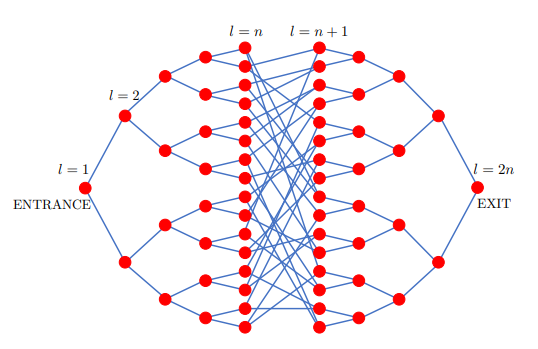

 A network of N = 2n+1 − 2 coupled oscillators
obtained by randomly gluing two binary trees. Each mass
is mj = 1 for all j ∈ [N] and is labeled by a random
bit string of size 2n. Edges denote springs of constant
κjk = 1. The goal is to find the label of the EXIT mass
given the label of the ENTRANCE mass and given oracle
access to the network.

While this notebook will be following the algorithm described by the[1] 2023 paper above, it should be noted that this problem was first set by this paper from October 2002 [2].

The following code segment imports all the necessary libraries for this notebook. Both Qiskit and NetworkX are required for the generate_pauli_list function, but the Pauli lists for 10 and 20 qubits (the examples in this notebook) have already been generated and cached in the glued_trees_cache.json file.

In [111]:
!pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 8.9 MB/s eta 0:00:00


In [112]:
!pip install "qiskit[visualization]">=1.0 --user

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [113]:
!pip install qiskit-aer --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 51.8 MB/s eta 0:00:00


In [114]:
import json
import pathlib
import random
from typing import cast

import matplotlib.pyplot as plt
import numpy as np
import tqdm

from classiq import *
from classiq.execution import ExecutionPreferences
from qiskit.quantum_info import SparsePauliOp
import networkx as nx

In [115]:
# notebooks path issue
def get_path(file_name):
    path = (
        pathlib.Path(__file__).parent.resolve()
        if "__file__" in globals()
        else pathlib.Path(".")
    )
    return path / file_name

### Quantum Algorithm
To model the columns of the glued trees structure as a system of coupled harmonic oscillators, we consider a matrix $\mathbf{A}$ of size $N \times N$ corresponding to the nodes of the glued trees structure, such that $N=2^{n+1}-2$ and $n$ is the number of columns of one of the two glued trees. This matrix is defined as $\mathbf{A}:=3(\mathbf{1}_N)-A$, where $A$ is the adjacency matrix of the glued trees system using any ordering.

For demonstration purposes, we will be using a simple linear ordering of this adjacency matrix such that the entrance node is first and the exit node is last. This matrix will be symmetrical and take the following shape:
$$
\mathbf{A} = \begin{pmatrix}
3 & -1 & -1 & 0 & \cdots & \cdots & \cdots & \cdots & 0 \\
-1 & 3 & 0 & -1 & \cdots & \cdots & \cdots & \cdots & 0 \\
-1 & 0 & 3 & 0 & \cdots & \cdots & \cdots & \cdots & 0 \\
0 & -1 & 0 & 3 & \cdots & \cdots & \cdots & \cdots & 0 \\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots & \vdots \\
\vdots & \vdots & \vdots & \vdots & \vdots & 3 & 0 & -1 & 0 \\
\vdots & \vdots & \vdots & \vdots & \vdots & 0 & 3 & 0 & -1 \\
\vdots & \vdots & \vdots & \vdots & \vdots & -1 & 0 & 3 & -1 \\
0 & 0 & 0 & 0 & \cdots & 0 & -1 & -1 & 3
\end{pmatrix}
$$

As shown in further detail in the paper, we can define a block Hamiltonian $\mathbf{H}$ such that
$$
\mathbf{H} := -\begin{pmatrix}
\mathbf{0} & \mathbf{B} \\
\mathbf{B}^† & \mathbf{0}
\end{pmatrix}
$$
where $\mathbf{B}$ is any $N \times M$ matrix such that $\mathbf{B}\mathbf{B}^†=\mathbf{A}$. However, to use this matrix $\mathbf{H}$ for Hamiltonian simulation, it must have a size corresponding to a power of two, while $\mathbf{A}$ is size $N \times N$. We can deal with this by ensuring that $\mathbf{B}$ is size $N \times (N+4)$, so the resulting Hamiltonian $\mathbf{H}$ is a square matrix with side length $2N+4 = 2(2^{n+1}-2)+4 = 2^{n+2}$. This means that a glued trees system with $n$ columns for one tree can be simulated using $n+2$ qubits.

The following code segments contain all of the helper methods that relate to creating the matrix $\mathbf{H}$ and processing it in a form that Classiq's `exponentiation_with_depth_constraint` function can understand.

The `pauli_str_to_enums` and `pauli_list_to_hamiltonian` functions are taken from the Classiq documentation and convert the list of tuples input into a `PauliTerm` list, the input Classiq recognizes for its exponentiation function.

In [134]:
CHAR_TO_STUCT_DICT = {"I": Pauli.I, "X": Pauli.X, "Y": Pauli.Y, "Z": Pauli.Z}


def pauli_str_to_enums(pauli):
    return [CHAR_TO_STUCT_DICT[s] for s in pauli]


def pauli_list_to_hamiltonian(pauli_list):
    return [
        PauliTerm(
            pauli=pauli_str_to_enums(pauli), coefficient=cast(complex, coeff).real
        )
        for pauli, coeff in pauli_list
    ]

At this project, we generate the matrix $\mathbf{A}$ by building the glued trees structure using the NetworkX library such that the nodes are labeled in order from the entrance to exit node and using the `nx.adjacency_matrix` function to generate an adjacency matrix using that ordering. We will decompose $\mathbf{A}$ using [Cholesky decomposition](https://en.wikipedia.org/wiki/Cholesky_decomposition) to get a square matrix where its product with its conjugate transpose is equal to $\mathbf{A}$. This matrix is the same size as $\mathbf{A}$, however, so we must pad it with 4 columns of zeroes to get our matrix $\mathbf{B}$ of size $N \times (N+4)$ so $\mathbf{H}$ has a size corresponding to a power of two. We can then create the block Hamiltonian with the proper size using $\mathbf{B}$ and $\mathbf{B}^†$, and generate its full Pauli list using Qiskit's `SparsePauliOp.from_operator` [[3](#SparsePauliOp)] function.

All Pauli list outputs are cropped so they have no more than 200 terms. This is to ensure that the circuit depth is at a reasonable range (low thousands) given the limits of current quantum hardware. As a result of this approach, as the number of qubits increases, the accuracy of the Pauli list in comparison to the matrix it represents diminishes so the circuit depth remains roughly constant.

The Pauli list representation of $\mathbf{H}$ for qubit sizes small enough to calculate (13 qubits and lower) are generated and cropped using the `generate_pauli_list` function, which uses an ad hoc approach that tries to represent the Pauli list as a whole as accurately as possible using only the 200 ostensibly most relevant terms to simulating the system.

The cropping algorithm, defined in the `crop_pauli_list` function, first selects 120 terms (60%) by going through each character position from the end to the start and picking the Pauli terms with the largest coefficients that contain each of the four possibilities ($I$, $X$, $Y$, $Z$) at that character position. If all positions are exhausted before reaching 120 terms, the algorithm takes another pass through the character positions until 120 are selected. The other 80 terms (40%) are selected by picking the 80 remaining terms with the largest coefficients. The algorithm balances important high-coefficient terms with diversity in the 200 selected terms.

The Pauli lists for qubit sizes too large to fully calculate (greater than 13 qubits) are approximated by padding with the second character of the Pauli strings of the largest cropped Pauli list that can be generated in reasonable time, as this follows a pattern present in the vast majority of strings in the cropped Pauli list.

In [135]:
def crop_pauli_list(pauli, size):
    if len(pauli) <= size:
        return pauli
    result = []
    idx = 0
    while len(result) < round(size * 0.6):
        for i in range(len(pauli[0][0]) - 1, -1, -1):
            for k in pauli:
                if k[0][i] == "IXYZ"[idx % 4] and k not in result:
                    result.append(k)
                    break
            idx += 1
    for i in pauli:
        if len(result) >= size:
            break
        if i not in result:
            result.append(i)
    return result

In [136]:
def generate_pauli_list(qubits):
    dim = qubits - 2
    T1 = nx.balanced_tree(2, dim - 1)
    T2 = nx.relabel_nodes(T1, lambda x: 2 ** (dim + 1) - 3 - x)
    T = nx.union(T1, T2)
    edges = {i: 0 for i in range(2**dim - 1, 2 ** (dim - 1) + 2**dim - 1)}
    for i in range(2 ** (dim - 1) - 1, 2**dim - 1):
        nums = [
            j for j in range(2**dim - 1, 2 ** (dim - 1) + 2**dim - 1) if edges[j] < 1
        ]
        if len(nums) == 0:
            nums = [
                j
                for j in range(2**dim - 1, 2 ** (dim - 1) + 2**dim - 1)
                if edges[j] < 2
            ]
        vals = random.sample(nums, k=2)
        for j in vals:
            edges[j] += 1
        T.add_edges_from([(i, vals[0]), (i, vals[1])])
    A = 3 * np.identity(2 ** (dim + 1) - 2) - np.array(
        nx.adjacency_matrix(T, nodelist=sorted(T.nodes())).todense()
    )
    B = np.hstack((np.linalg.cholesky(A), np.zeros((2 ** (dim + 1) - 2, 4))))
    H = -np.block(
        [
            [np.zeros((B.shape[0], B.shape[0])), B],
            [B.conj().T, np.zeros((B.shape[1], B.shape[1]))],
        ]
    )
    c = SparsePauliOp.from_operator(H)
    result = [(str(c.paulis[i]), c.coeffs[i].real) for i in range(len(c))]
    return crop_pauli_list(sorted(result, key=lambda x: abs(x[1]), reverse=True), 200)


In [137]:
def pauli_str(qubits, recalculate=False):
    with open(get_path("glued_trees_cache.json"), "r") as f:
        cache = json.load(f)
    if not recalculate and str(qubits) in cache:
        return cache[str(qubits)]
    if qubits > 13:
        return [
            (i[0][0] + i[0][1] * (qubits - len(i[0])) + i[0][1:], i[1])
            for i in generate_pauli_list(13)
        ]
    return generate_pauli_list(qubits)

We are now ready to run our main execution function, `run_point`. This function takes in the number of qubits `qubits` and the time `t` to perform Hamiltonian simulation $e^{-it\mathbf{H}}$ using the `exponentiation_with_depth_constraint` function in the Classiq software development kit.

The `max_depth` parameter is set to 1400, which is around the range of the current limit for comprehensible results in state of the art quantum computers. The `num_shots` parameter is set to 8192 to give enough of room for significant spikes in a state to be apparent given the high number of total possible states.

The resulting quantum state can be written as follows:
$$
\begin{aligned}
|\psi(t)\rangle &\propto \begin{pmatrix}
\dot{\vec{x}}(t) \\
i\mathbf{B}^†\vec{x}(t)
\end{pmatrix} \\
\begin{pmatrix}
\dot{\vec{x}}(t) \\
i\mathbf{B}^†\vec{x}(t)
\end{pmatrix} &= e^{-it\mathbf{H}} \begin{pmatrix}
\dot{\vec{x}}(0) \\
i\mathbf{B}^†\vec{x}(0)
\end{pmatrix}
\end{aligned}
$$
where $\vec{x}(0)=(0,0,\dots,0)^T$ and $\dot{\vec{x}}(0)=(1,0,\dots,0)^T$ using a linear ordering of nodes.

Since the speed of the entrance node oscillator $|\dot{x}_1(t)|$ is represented by the quantum state $|0\rangle$ and should have probability 1 at $t=0$, there is no specific state preparation necessary for this system. It should also be noted that since our matrix $\mathbf{B}^†$ is padded with 4 rows of zeroes, the highest 4 quantum states do not correspond to the displacement or speed of any oscillator. This means that the quantum state representing the speed of the exit node oscillator $|\dot{x}_N(t)|$, which is what we are most interested in, will correspond to $|N-1\rangle=|2^{n+1}-3\rangle$. We will be tracking this particular quantum state at time $t \approx 2n$ expecting a spike, which represents the system of oscillators "reaching" the exit node from the initial push to the entrance node.

We will run the `run_point` function through a helper function `run_range`, which executes it 13 times in total for a given qubit size, spanning from $t=2n-12$ to $t=2n+12$ in 2 second intervals. This range gives time to observe oscillation occurring at the state value corresponding to $|\dot{x}_N(t)|$ while also being close enough around $t=2n$, the time where we are expecting a spike.

## SUZUKI TROTER APROXIMATION FOR COUPLED CLASSICAL OSCILLATORS

We use Classiq function: exponentiation_with_depth_constraint, The exponentiation function produces a quantum gate that approximates the exponentiation,$\exp(-iHt)$ of any input Hermitian operator, $H$ The Classiq engine automatically generates an efficient higher-order Trotter-Suzuki quantum program [1] that minimizes the functional error and satisfies a given local constraint on the depth. The functional error is measured by the operator norm [4] and evaluated according to Ref.[2]

Function: exponentiation_with_depth_constraint

Arguments:

pauli_operator: CArray[PauliTerm] - the Hamiltonian to exponentiate as described above.

evolution_coefficient: CReal - a global evolution coefficient (the parameter
 above).

max_depth: CInt - a maximal depth for the implementation.

qbv: QArray[QBit] - the quantum state on which we apply the evolution.






In [138]:
def run_point(qubits, t, pauli_list):
    @qfunc
    def main(state: Output[QArray[QBit]]) -> None:
        allocate(len(pauli_list[0][0]), state)
        exponentiation_with_depth_constraint(
            pauli_list_to_hamiltonian(pauli_list),
            evolution_coefficient=t,
            max_depth=1400,
            qbv=state,
        )

    execution_preferences = ExecutionPreferences(num_shots=8192)
    model = set_execution_preferences(create_model(main), execution_preferences)
    quantum_program = synthesize(model)
    job = execute(quantum_program)
    filename = (
        str(qubits)
        + "-qubits/2n"
        + (
            str(t - 2 * qubits + 4)
            if t < 2 * qubits - 4
            else "+" + str(t - 2 * qubits + 4)
        )
    )
    with open(get_path("results/" + filename + ".json"), "w") as f:
        json.dump(dict(job.result()[0].value), f)


def run_range(qubits, recalculate=False):
    pauli_list = pauli_str(qubits, recalculate)
    for i in tqdm.tqdm(range(-12, 13, 2)):
        run_point(qubits, 2 * qubits - 4 + i, pauli_list)

The following code segment displays the execution of run_range for 10 qubits ( n=8,N=510 ), a higher qubit size that is still simulatable. In addition, it is low enough that its Pauli list can still be fully generated and cropped.

This instance of the function should take a few minutes to run. As defined, it will use the cached Pauli list for 10 qubits in glued_trees_cache.json. If you would like to recalculate the Pauli list, ensure that you have uncommented and run the two lines at the top of this notebook and add recalculate=True as the second parameter to the function.

In [ ]:
run_range(10)

In [ ]:
  0%|          | 0/13 [00:00<?, ?it/s]  8%|▊         | 1/13 [00:08<01:39,  8.26s/it] 15%|█▌        | 2/13 [00:15<01:23,  7.57s/it] 23%|██▎       | 3/13 [00:23<01:18,  7.82s/it] 31%|███       | 4/13 [00:30<01:09,  7.70s/it] 38%|███▊      | 5/13 [00:38<00:59,  7.46s/it] 46%|████▌     | 6/13 [00:45<00:51,  7.34s/it] 54%|█████▍    | 7/13 [00:53<00:45,  7.56s/it] 62%|██████▏   | 8/13 [01:01<00:38,  7.77s/it] 69%|██████▉   | 9/13 [01:09<00:31,  7.81s/it] 77%|███████▋  | 10/13 [01:17<00:23,  7.90s/it] 85%|████████▍ | 11/13 [01:25<00:15,  7.89s/it] 92%|█████████▏| 12/13 [01:32<00:07,  7.60s/it]100%|██████████| 13/13 [01:40<00:00,  7.77s/it]100%|██████████| 13/13 [01:40<00:00,  7.72s/it]


In [ ]:
run_range(20)

In [ ]:
  0%|          | 0/13 [00:00<?, ?it/s]  8%|▊         | 1/13 [00:12<02:31, 12.64s/it] 15%|█▌        | 2/13 [00:26<02:25, 13.26s/it] 23%|██▎       | 3/13 [00:40<02:17, 13.71s/it] 31%|███       | 4/13 [00:54<02:04, 13.88s/it] 38%|███▊      | 5/13 [01:08<01:51, 13.90s/it] 46%|████▌     | 6/13 [01:22<01:36, 13.85s/it] 54%|█████▍    | 7/13 [01:35<01:21, 13.66s/it] 62%|██████▏   | 8/13 [01:49<01:08, 13.61s/it] 69%|██████▉   | 9/13 [02:02<00:54, 13.60s/it] 77%|███████▋  | 10/13 [02:16<00:40, 13.50s/it] 85%|████████▍ | 11/13 [02:28<00:26, 13.22s/it] 92%|█████████▏| 12/13 [02:41<00:13, 13.19s/it]100%|██████████| 13/13 [02:55<00:00, 13.27s/it]100%|██████████| 13/13 [02:55<00:00, 13.48s/it]


We can now graph the results we have generated using the simulator, which have been saved into directories in the `results` folder based on their qubit size. The `graph_results` function creates a plot of the proportion of shots for the qubit state $|N-1\rangle$ corresponding to $|\dot{x}_N(t)|$ for a given qubit size from $t=2n-12$ to $t=2n+12$ and saves it in the `figures` folder.

In [139]:
def graph_results(qubits):
    states = [(str(i) if i < 0 else "+" + str(i)) for i in range(-12, 13, 2)]
    times = [2 * qubits - 4 + int(i) for i in states]
    data = []
    for i in states:
        with open(
            get_path("results/" + str(qubits) + "-qubits" + "/2n" + i + ".json"), "r"
        ) as f:
            j = json.load(f)
            key = str("0" + bin(2 ** (qubits - 1) - 3)[2:])
            data.append(j["counts"][key] / j["num_shots"] if key in j["counts"] else 0)
    plt.plot(times, data)
    plt.xlabel("Time (s)")
    plt.ylabel("Proportion of |" + str(2 ** (qubits - 1) - 3) + "> shots")
    plt.title(
        r"Glued Trees System at $t \approx 2n$ for "
        + str(qubits)
        + r" Qubits ($n="
        + str(qubits - 2)
        + r"$)"
    )
    plt.savefig(
        get_path("figures/" + str(qubits) + "_qubits.png"), bbox_inches="tight", dpi=300
    )
    plt.show()

In [ ]:
graph_results(10)

In [ ]:
graph_results(20)

## QUBITIZATION APROXIMATION FOR COUPLED CLASSICAL OSCILLATORS

In [140]:
HAMILTONIAN = pauli_list_to_hamiltonian(pauli_list)

NameError: name 'pauli_list' is not defined

###REFERENCES

[1] Babbush, Ryan and Berry, Dominic W. and Kothari, Robin and Somma, Rolando D. and Wiebe, Nathan. "Exponential Quantum Speedup in Simulating Coupled Classical Oscillators." Phys. Rev. X 13, 041041 (2023)

[2]Andrew M Childs, Richard Cleve, Enrico Deotto, Edward Farhi, Sam Gutmann, and Daniel A Spielman,
“Exponential algorithmic speedup by a quantum walk,” in Proceedings of the thirty-fifth annual ACM symposium
on Theory of computing (2003) pp. 59–68.

[3]https://docs.quantum.ibm.com/api/qiskit/qiskit.quantum_info.SparsePauliOp

[4] https://en.wikipedia.org/wiki/Operator_norm